This is Q_learning ' hard ' version
Training is Done after  2000  Episodes :)
Q values are stored in a matrix with 25 rows (for number of total grids) and with 4 columns (for number of actions)
Q values after Training:
[[14.4194281  14.37053198 11.77984636 11.93422982]
 [16.02158677 12.97748529 13.4194281  12.97748529]
 [14.0030781  11.58372808 11.82994616 14.4194281 ]
 [12.97746987  3.30602055  4.54721836  7.92433259]
 [11.44299953  0.69151181  2.3522613   4.82252335]
 [16.02158677 16.01894831 12.97573933 13.41843587]
 [17.80176308 14.4194281  14.4194281  14.4194281 ]
 [15.38416774 12.87658086 12.91714777 16.02158677]
 [14.4194281   9.9464373   8.61071183 10.33392091]
 [12.74108577  5.30093295  4.55449952  9.84771899]
 [17.80175298 17.80176308 14.41911845 15.02149233]
 [19.77973676 16.02158677 16.02158677 16.02158677]
 [17.79891991 14.41938175 14.41933969 17.80176308]
 [15.72956631 12.73499744 12.97499867 16.02158677]
 [14.15676308  9.81965062  8.85097583 12.98265568]
 [19.77973676 19

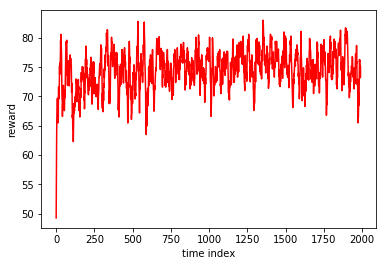

------------------------
Using the trained Q values and starting from a random state in the grid the following states are visited until agent reaches either A' B'


agent starts from  [5 2]
takes action  0
reaches state  [5 3]
takes action  0
reaches state  [5 4]
takes action  0
reaches state  [5 5]
takes action  3
reaches state  [4 5]
takes action  2
reaches state  [4 3]
------------------------
Done!
agent reaches B'  after  5  steps


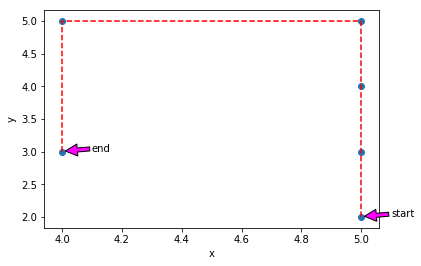

In [6]:
import math
from collections import deque
import gym
from gym import spaces
from gym.envs.classic_control import rendering
from gym.utils import seeding
import numpy as np
import matplotlib.pyplot as plt


class Qlearning():
    def __init__(self):
        mode = 'hard'
        n_episodes = 2000
        n_steps = 50
        min_alpha = 0.1
        min_epsilon = 0.1
        gamma = 0.9
        max_env_steps = None

        self.action_mode = mode  # either easy or hard version
        self.n_episodes = n_episodes   # training episodes
        self.n_steps = n_steps  # training episodes
        self.min_alpha = min_alpha  # learning rate
        self.min_epsilon = min_epsilon  # exploration rate
        self.gamma = gamma  # discount factor

        self.env = GridWorld()
        if max_env_steps is not None: self.env._max_episode_steps = max_env_steps

        self.Q = np.zeros(shape=(np.power(self.env.grid_size, 2), self.env.action_space.n))

    def take_action(self, state, epsilon):
        state_index = self.hash_code(state)
        q_array = np.array([self.Q[state_index][0], self.Q[state_index][1], self.Q[state_index][2], self.Q[state_index][3]])
        if self.action_mode == 'easy':
            if np.random.random() <= epsilon:
                a = self.env.action_space.sample()
            else:
                a = np.argmax(q_array)
        elif self.action_mode == 'hard':
            flip = np.random.uniform(0, 1)
            if np.random.random() <= epsilon:
                a = self.env.action_space.sample()
            else:
                if flip <= 0.1:
                    a = self.env.action_space.sample()
                else:
                    a = np.argmax(q_array)
        return a

    def update_q(self, state_old, action, reward, state_new, alpha):
        new_state_index = self.hash_code(state_new)
        old_state_index = self.hash_code(state_old)
        q_array = np.array([self.Q[new_state_index][0], self.Q[new_state_index][1], self.Q[new_state_index][2], self.Q[new_state_index][3]])
        self.Q[old_state_index][action] = self.Q[old_state_index][action] + alpha * (reward + self.gamma * np.max(q_array) - self.Q[old_state_index][action])

    def hash_code(self, s):
        return (s[1] - 1)*self.env.grid_size + s[0] - 1

    def get_epsilon(self, t):
        return max(self.min_epsilon, 1/(t+1))

    def run(self):
        reward_vector = deque(maxlen=self.n_episodes)

        for e in range(self.n_episodes):

            alpha = self.min_alpha
            epsilon = self.get_epsilon(e)
            current_state = self.env.reset()
            r = 0

            for k in range(50):
                action = self.take_action(current_state, epsilon)
                obs, reward = self.env.step(current_state, action)
                new_state = obs
                self.update_q(current_state, action, reward, new_state, alpha)
                current_state = new_state
                r = r + reward

            reward_vector.append(r)
            if e == self.n_episodes-1:
                print('This is Q_learning \'', self.action_mode, '\' version')
                print('Training is Done after ', self.n_episodes, ' Episodes :)')
                print('Q values are stored in a matrix with 25 rows (for number of total grids) and with 4 columns (for number of actions)')
                print('Q values after Training:')
                print(self.Q)

        plt.plot(self.movingaverage(reward_vector, 10), 'r')
        plt.ylabel('reward')
        plt.xlabel('time index')
        plt.show()
        return e

    def implement(self):
        reward_vector = deque(maxlen=self.n_steps)
        state_x = deque(maxlen=self.n_steps)
        state_y = deque(maxlen=self.n_steps)
        current_state = self.env.reset()
        r = 0
        state_x.append(current_state[0])
        state_y.append(current_state[1])
        print('------------------------')
        print('Using the trained Q values and starting from a random state in the grid the following states are visited until agent reaches either A\' B\'')
        print('\n')
        print('agent starts from ', current_state)

        for e in range(self.n_steps):
            self.env.render()
            action = self.take_action(current_state, 0)
            print('takes action ', action)
            obs, reward = self.env.step(current_state, action)
            current_state = obs
            state_x.append(current_state[0])
            state_y.append(current_state[1])
            r = r + reward
            reward_vector.append(reward)
            print('reaches state ', current_state)
            if (current_state[0] == self.env.prime_A_x and current_state[1] == self.env.prime_A_y) or (current_state[0] == self.env.prime_B_x and current_state[1] == self.env.prime_B_y):
                if current_state[0] == self.env.prime_A_x and current_state[1] == self.env.prime_A_y:
                    prime_state = 'A\''
                else:
                    prime_state = 'B\''
                break

        print('------------------------')
        print('Done!')
        print('agent reaches', prime_state, ' after ', e+1, ' steps')

        fig = plt.subplot()
        fig.scatter(state_x, state_y)
        plt.plot(state_x, state_y, 'r--')
        fig.annotate('start', xy=(state_x[0] + 0.01, state_y[0] + 0.01), xytext=(state_x[0] + 0.1, state_y[0] + 0),
                     arrowprops=dict(facecolor='magenta', shrink=0.01), )
        fig.annotate('end', xy=(state_x[-1] + 0.01, state_y[-1] + 0.01), xytext=(state_x[-1] + 0.1, state_y[-1] + 0),
                     arrowprops=dict(facecolor='magenta', shrink=0.01), )
        plt.ylabel('y')
        plt.xlabel('x')
        plt.show()
        return e

    def movingaverage(self, values, window):
        weights = np.repeat(1.0, window) / window
        sma = np.convolve(values, weights, 'valid')
        return sma


class GridWorld(gym.Env):
    metadata = {
        'render.modes': ['human', 'rgb_array'],
        'video.frames_per_second': 1
    }

    # specific positions
    A_x = 2
    A_y = 5
    prime_A_x = 2
    prime_A_y = 1
    B_x = 4
    B_y = 5
    prime_B_x = 4
    prime_B_y = 3

    # boundary of grid
    x_min = 0
    x_max = 5
    y_min = 0
    y_max = 5

    action_num = 4
    grid_size = 5

    def __init__(self):
        self.action_space = spaces.Discrete(self.action_num)
        self.state_space = spaces.Discrete(self.grid_size)
        self.viewer = None
        self.agent_trans = None
        self.state = None
        self.seed()

    def step(self, current_state, a):
        state = self.state
        x, y = state
        x_old, y_old = state

        boost_mode = False

        if (x_old == self.A_x and y_old == self.A_y) or (x_old == self.B_x and y_old == self.B_y):
            boost_mode = True

        if boost_mode:
            if x_old == self.A_x and y_old == self.A_y:
                x = self.prime_A_x
                y = self.prime_A_y
                immediate_reward = +10

            if x_old == self.B_x and y_old == self.B_y:
                x = self.prime_B_x
                y = self.prime_B_y
                immediate_reward = +5
        else:
            if a == 0:
                x = x_old
                y = y_old + 1
                immediate_reward = 0.0
            elif a == 1:
                x = x_old + 1
                y = y_old
                immediate_reward = 0.0
            elif a == 2:
                x = x_old
                y = y_old - 1
                immediate_reward = 0.0
            elif a == 3:
                x = x_old - 1
                y = y_old
                immediate_reward = 0.0

            if x > 5 or x < 1 or y > 5 or y < 1:
                x = x_old
                y = y_old
                immediate_reward = -1.0

        self.state = (x, y)
        return np.array(self.state), immediate_reward

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self):
        self.state = (self.state_space.sample()+1, self.state_space.sample()+1)
        return np.array(self.state)

    def close(self):
        self.viewer.close()

    def render(self, mode='human'):
        screen_width = 500
        screen_height = 500
        scale = 100
        state = self.state
        x, y = state

        if self.viewer is None:
            self.viewer = rendering.Viewer(screen_width, screen_height)
            for i in range(6):
                line_s_x = i * scale
                line_s_y = 0 * scale
                line_e_x = i * scale
                line_e_y = 5 * scale
                line = self.viewer.draw_line((line_s_x, line_s_y), (line_e_x, line_e_y))
                self.viewer.add_geom(line)
            for i in range(6):
                line_s_y = i * scale
                line_s_x = 0 * scale
                line_e_y = i * scale
                line_e_x = 5 * scale
                line = self.viewer.draw_line((line_s_x, line_s_y), (line_e_x, line_e_y))
                self.viewer.add_geom(line)
            agent_size = 30
            left, right, top, bottom = -agent_size, +agent_size, +agent_size, -agent_size
            agent = rendering.FilledPolygon([(left, bottom), (left, top), (right, top), (right, bottom)])
            self.agent_trans = rendering.Transform()
            agent.add_attr(self.agent_trans)
            agent.set_color(1.0, 0.5, 0.5)
            self.viewer.add_geom(agent)

        if self.state is None:
            return None

        self.agent_trans.set_translation((x-0.5)*100, (y-0.5)*100)
        return self.viewer.render(return_rgb_array=mode == 'rgb_array')


if __name__ == "__main__":
    agent = Qlearning()
    agent.run()
    agent.implement()

